ChEn-5310: Computational Continuum Transport Phenomena Spring 2022 UMass Lowell; Prof. V. F. de Almeida **10Feb22**

# XXa. Rayleigh-Ritz Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Dirichlet Boundary Conditions](#rayleigh-ritz)
   + [Data](#data)
   + [Lift function](#lift-function)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis)
   + [Results](#results)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators (OneNote [Engy-5310-rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=FQvvy1)).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

The motion of a quantum free particle of mass $\mu$ and energy $E$ confined to a box of size $L$ is described by the Schrodinger equation and the following associated problem of finding the wave function $\psi:[0,L]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{\hbar^2}{\\2\mu} \frac{d^2\psi}{\\dx^2} + V(x)\,\psi &= E\,\psi \quad\quad \forall \quad\quad x\in\ ]0,L[, \\
  \psi(0) &= 0, \\
  \psi(L) &= 0,
\end{align*}

with no potential energy $V(x)\equiv 0$.

In this course's notation, it is equivalent to solving the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + E\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D$, source, and $E$ slope. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D\,u'$, and it is often of interest as a derived quantity.

The normal diffusive flux at $x=b$ is $q_n(b) = -D\,u'(b) = q_{nb}$

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals  \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
   \norm{u_0-u^*_N}^2_{\Ecal} = \min\limits_{u_0\, \in\, V} \norm{u_0-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - E\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$
  
This formulation uses basis functions that satisfy the left homogeneous boundary condition, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$.

### [Data](#toa)<a id="data"></a>

Solve problem with parameter values:

> + a = 0
> + b = $2\,r_\text{vdw}$  (diameter of atom)
> + D = $\frac{\hbar^2}{\\2\mu} $

In [26]:
'''SI units'''
from scipy import constants as unit
from scipy import constants as const
unit.meter = 1

In [27]:
'''Importing the mendeleev package'''

try:
    import mendeleev  # creates the `name` mendeleev
except ImportError:
    print('Installing the "mendeleev" package...')
    print('')
    !pip install mendeleev
    import mendeleev
    
from mendeleev import element

In [28]:
'''Choose chemical element where the particle (electron) is localized'''

element_name = 'Phosphorus' # capitalized name
ele = element(element_name)
vdw_radius = ele.vdw_radius * unit.pico*unit.meter

In [29]:
'''Domain'''
x_a = 0*unit.angstrom
x_b = 2*vdw_radius

In [30]:
'''Parameters and data'''
hbar = const.hbar
mu = const.m_e
diffusion_coeff = hbar**2/2/mu

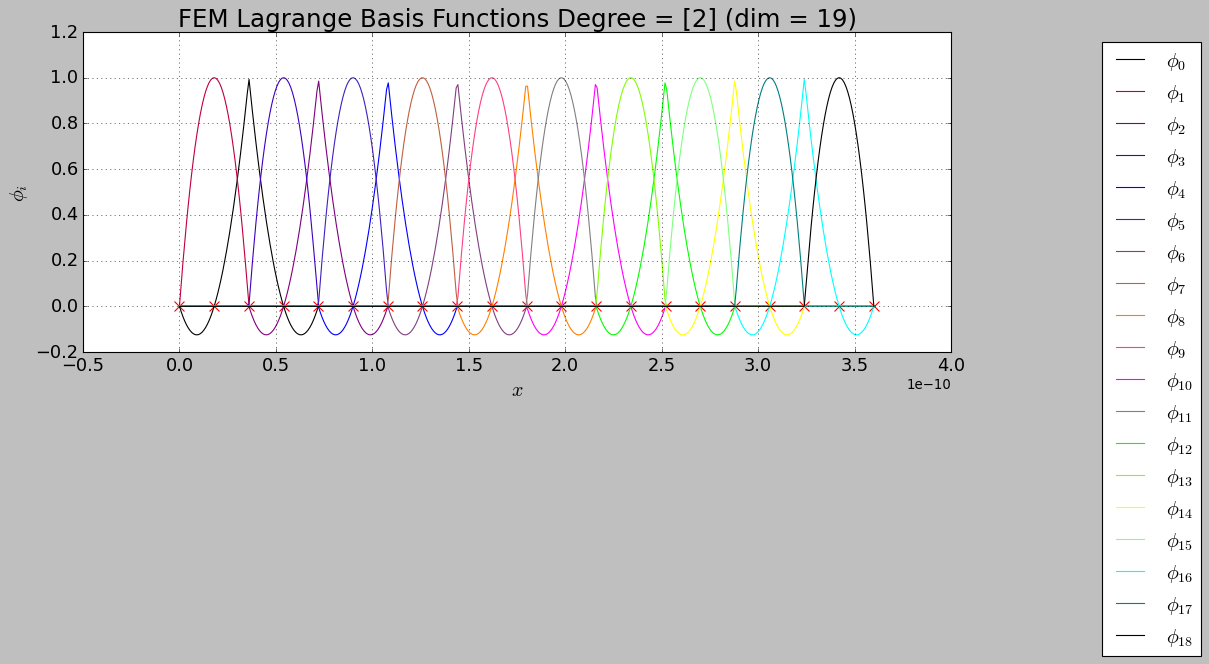

In [31]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [10] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400)

  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$

In [32]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff, "u'", "v'")
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [33]:
import numpy as np
    
if np.linalg.matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if np.linalg.matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [34]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [35]:
import numpy as np
import math
np.set_printoptions(precision=5)
energy_dimensionless = lambda_vec/(diffusion_coeff*math.pi**2/x_b**2)
print('E [hbar^2/2/mu*pi^2/L^2] = ', energy_dimensionless[:5])
quantum_numbers = np.round(np.sqrt(energy_dimensionless),1)
print('Quantum numbers = ', quantum_numbers[:5])

E [hbar^2/2/mu*pi^2/L^2] =  [ 1.00001  4.00085  9.00943 16.0513  25.18806]
Quantum numbers =  [1. 2. 3. 4. 5.]


In [36]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [37]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [38]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff*u_prime_star(x, c_star_vec)

In [39]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 25)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])
u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]
flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('First Quantum Number')
print('')

print("   x [A]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.angstrom), '       %3.5f'%t, '      %3.5f'%q)

First Quantum Number

   x [A]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        0.00000       1.00000
 2)  0.15        0.13063       0.97974
 3)  0.30        0.25858       0.95948
 4)  0.45        0.38290       0.91546
 5)  0.60        0.49983       0.85666
 6)  0.75        0.60888       0.79010
 7)  0.90        0.70710       0.69851
 8)  1.05        0.79324       0.60693
 9)  1.20        0.86611       0.49464
10)  1.35        0.92377       0.37923
11)  1.50        0.96597       0.25688
12)  1.65        0.99142       0.12895
13)  1.80        1.00000       0.00102
14)  1.95        0.99142       -0.12895
15)  2.10        0.96597       -0.25688
16)  2.25        0.92377       -0.37923
17)  2.40        0.86611       -0.49464
18)  2.55        0.79324       -0.60693
19)  2.70        0.70710       -0.69851
20)  2.85        0.60888       -0.79010
21)  3.00        0.49983       -0.85666
22)  3.15        0.38290       -0.91546
23)  3.30        0.25858       -0.95948
24)  3.45        0.13063  

In [15]:
'''Plot neutron flux modes'''
from engy_5310.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.angstrom, u_values, '-', label=r'wave function $n$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [A]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.angstrom, u_flux_x_values,'--', color=colors[j], label='flux $n$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Electron Energy Modes ($n$=%s # elem=%s, N=%i)'%(str(list(k_vec)),n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

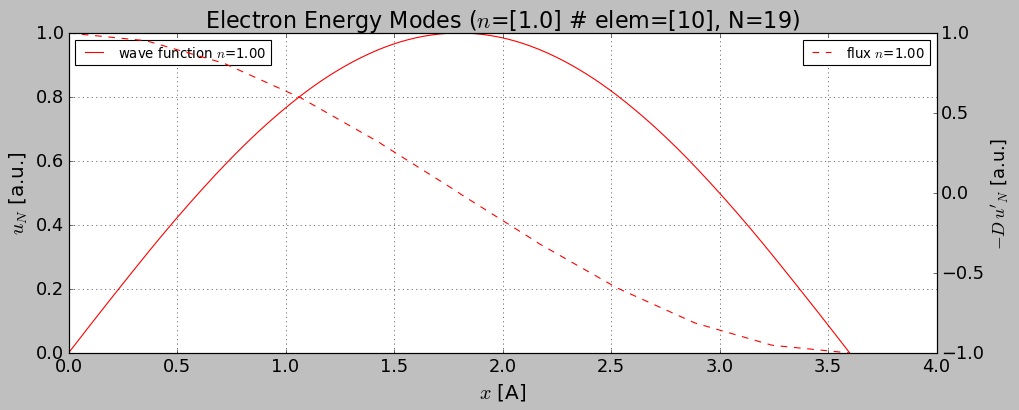

In [16]:
plot_modes(quantum_numbers[0:1], eigen_vec[:,0:1])

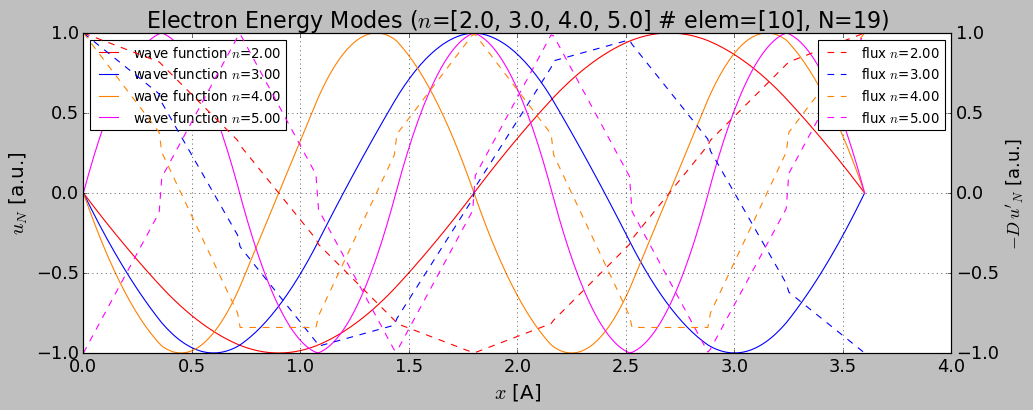

In [17]:
plot_modes(quantum_numbers[1:5], eigen_vec[:,1:5])

# Assignment 1 

### Particle in Box: 


 Imagine a classical free particle of mass μ and energy E is bouncing back and forth between walls separated by a distance L apart. This is sometimes called the particle in a box. One wall is at x = 0 and the other is at x = L, where L is the length of the box. Wave functions for the particle in a box must satisfy ψ(0) = ψ(L) = 0.
You can use any arbitrary potential function, in this case potential is zero in the box (x from 0 to L).

Consider the wave function; $ ψ(x) =  Asin(kx)   $ for $ 0 < x < L $ and $ ψ(x) = 0 $ for  elsewhere. 
To find "A", we use the normalization equation: 

$ \int_{0}^{L} |ψ(x)|^2dx = 1 $      then : $ A = \sqrt{\frac{2}{\\L}} $


This wave function must satisfies the Schrodinger eq:

$    -\frac{h^2}{\\2μ} \frac{d^2ψ}{\\dx^2} + V(x)ψ = Eψ           $,   in which $ V(x)$ is zero and $kL = πn$ for n = 1, 2, ...


 With B.C: 
 $ ψ(0) = ψ(L) = 0 $
 
The energy eigenstates |n> have wave functions:

$ ψ_n(x) =  \sqrt{\frac{2}{\\L}} sin(k_nx) $

where $ k_n = πn/L $ and $ n = 1, 2, ...$ Again, we have a discrete quantum number n labeling the possible states. By substitution this wave function in Schrodinger equation, their energies can be obtained by:


$    \frac{h^2}{\\2μ} \sqrt{\frac{2}{\\L}}k_n^2 sin(k_nx)  + V(x)\sqrt{\frac{2}{\\L}} sin(k_nx) = E\sqrt{\frac{2}{\\L}} sin(k_nx)           $

we had $ V(x) = 0 $

$    \frac{h^2}{\\2μ} k_n^2   = E           $



$ E_n = \frac{h^2 k_n^2}{\\2μ} =  \Bigg(\frac{π^2 h^2}{\\2μL^2}\Bigg) n^2                                             $

Energy levels and stationary state wave functions for the particle in a 1-D box. It is a common convention for the wave functions to be drawn on the corresponding energy level.



Text(0.5, 1.0, 'Particle in Box')

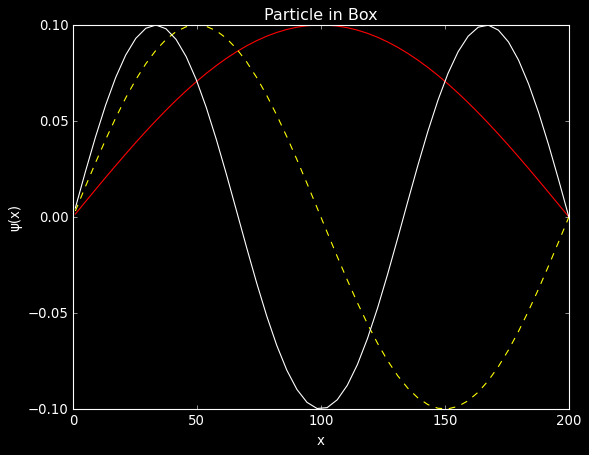

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

L=200

def f(x,n):
    return math.sqrt(2/L)*np.sin(n*x*np.pi/L)

xlist=np.linspace(1,L)
ylist=f(xlist, 1)
zlist=f(xlist, 2)
glist=f(xlist, 3)
mlist=f(xlist, 4)
alist=f(xlist, 5)
plist=f(xlist, 6)
hlist=f(xlist, 7)
klist=f(xlist, 8)
plt.plot(xlist,ylist, label="W1'[]", color='red')
plt.plot(xlist,zlist ,'--', label="W2", color='yellow')
plt.plot(xlist,glist , label="W3", color='white')
#plt.plot(xlist,mlist ,'--',label='W4', color='green')
#plt.plot(xlist,alist ,label='W5', color='blue')
#plt.plot(xlist,plist ,label='W6', color='purple')
#plt.plot(xlist,hlist ,'--',label='W7', color='pink')
#plt.plot(xlist,klist ,label='W8', color='orange')
plt.xlabel('x');plt.ylabel('ψ(x)')
plt.title('Particle in Box')
    

# Assignment 2

### Scattering from a square barrier

A square barrier is a potential of the form:


$ U(x) = 0    $ for  $  -10L ≤ x ≤ 0   $

$ U(x) = U_0   $ for $  0 ≤ x ≤ L   $ 

$ U(x) = 0   $ for $  L ≤ x ≤ 11L   $ 



The barrier is characterized by its “height” $U_0$ and its “width” $L$. The interaction zone here
is the interval between 0 and $L$, and $U_L = U_R = 0$. Since the two outside potentials are
equal, there are no reflecting states from the barrier. In this section, we will analyze the
scattering states.

To solve the Schrodinger eq: 
$    -\frac{h^2}{\\2μ} \frac{d^2ψ}{\\dx^2} + U(x)ψ = Eψ           $

Thus $ψ(x)$ satisfies:


$  ψ"(x) = -\frac{2μ}{\\h^2} (E − U(x)) ψ(x)   $




we can paste together known solutions for the three regions of constant potential, using the fact that $ψ(x)$ and $ψ'(x)$ are continuous at both x = 0 and x = L.
There are two different cases for the wave function in the interaction zone, depending on whether
the energy E is greater or less than $U_0$. We will consider these two situations in turn.
First, suppose that 
$ E < U_0$. The wave function for an energy eigenstate in three sections has the form:
 
## $ E < U_0$
 $  ψ(x) = e^{ikx} + Be^{−ikx}  $    for  $  -10L ≤ x ≤ 0 $
 
$  ψ(x) =   Ce^{bx} + De^{−bx} $       for   $  0 ≤ x ≤ L $

$  ψ(x) =  Fe^{ikx} $        for            $ L ≤ x ≤ 11L  $

Text(0.5, 1.0, 'Scattering from a square barrier for E<U0')

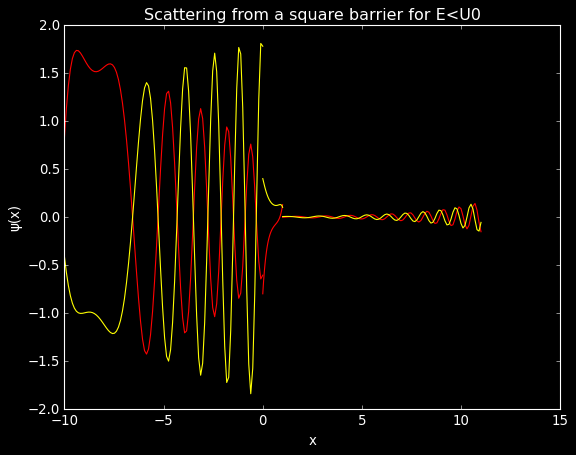

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

U0=10 
mu= 2
L=1  
h= 1 

E=np.linspace(2,9 , num=100)
x1=np.linspace(-10*L,0 , num=100)
x2=np.linspace(0, L , num=100)
x3=np.linspace(L, 11*L, num=100)



def k(mu,h,E,U0):
    return np.sqrt(2*mu*E/h**2)
k=k(mu,h,E,U0)

def b(mu,h,E,U0):
    return np.sqrt(2*mu*(U0-E)/h**2)
b=b(mu,h,E,U0)

# Region 1

def f1(k, x, b, L):
    return np.exp(1j*k*x) + np.exp(-1j*k*x)*2*np.sinh(b*L)*(b**2+k**2)/((b+1j*k)**2*np.exp(-b*L)-(b-1j*k)**2*np.exp(b*L))        
y=f1(k, x1, b, L)

y=np.array(y)

plt.plot(x1 ,np.imag(y), label="Img", color='red')
plt.plot(x1 ,np.real(y), label="Real", color='yellow')

# Region 2

def F(k, b, L):
    return 1j*4*k*b*np.exp(-1j*k*L)/((b+1j*k)**2*np.exp(-b*L)-(b-1j*k)**2*np.exp(b*L))
F =F(k, b, L)

def f2(b,L,k,F,x):
    return 0.5*np.exp(-b*L)*(1+1j*k/b)*np.exp(1j*k*L)*F*np.exp(b*x)+0.5*np.exp(b*L)*(1-1j*k/b)*np.exp(1j*k*L)*F*np.exp(-b*x)
y2=f2(b,L,k,F,x2)
y2=np.array(y2)

plt.plot(x2 ,np.imag(y2), label="Img", color='red')
plt.plot(x2 ,np.real(y2), label="Real", color='yellow')

# Region 3

def f3(F,k,x):
    return F*np.exp(1j*k*x)

y3=f3(F,k,x3)
y3=np.array(y3)

plt.plot(x3 ,np.imag(y3), label="Img", color='red')
plt.plot(x3 ,np.real(y3), label="Real", color='yellow')
plt.xlabel('x');plt.ylabel('ψ(x)')
plt.title('Scattering from a square barrier for E<U0')

where $ k =  \sqrt{\frac{2μ}{\\h^2}E} $ and $ b =\sqrt{\frac{2μ}{\\h^2}(U_0 − E)} $ .



**ADD BOUNDARY CONDITION FOR $-10L <x< 11L$** :


$ ψ(x = -10L) =  e^{-i10kL} + 2e^{i10kL} \frac{(b^2 + k^2)}{\\\\(b + ik)^2e^{−bL} − (b − ik)^2e^{bL}} sinh(bL) $

$ ψ(x = 11 L) = \frac{4ikbe^{i10kL}}{\\(b + ik)^2e^{−bL} − (b − ik)^2e^{bL}}  $

The boundary conditions at $ x = 0$ tell us that:

$ψ(x) $ continuous: $1 + B = C + D,$


$ψ'(x)$ continuous: $ik(1 − B) = b(C − D),$


while those at $ x = L$ are:


$ψ(x)$ continuous:  $ Ce^{bL} + De^{−bL} = Fe^{ikL},$


$ψ'(x)$ continuous: $ b ( Ce^{bL} − De^{−bL} ) = ikFe^{ikL} $

We can solve this system and find the wave function everywhere.
What we are really interested in is the transmission coefficient T = |F|, so we want to
find F using above equations. 



$ C = - De^{−2bL} + Fe^{ikL}e^{-bL}                    $

$ b ( -De^{−2bL} + Fe^{ikL}e^{-bL} ) e^{bL} − bDe^{−bL}  = ikFe^{ikL} $

$ -b De^{−bL} + bFe^{ikL}  − bDe^{−bL}  = ikFe^{ikL} $

$ -2b De^{−bL}   = ikFe^{ikL} - bFe^{ikL} $

then: 

$ D = \frac{1}{\\2} e^{bL} ( 1 - \frac{ik}{\\b}) e^{ikL}F, $

$ C = \frac{1}{\\2} e^{−bL} ( 1 + \frac{ik}{\\b} ) e^{ikL}F, $

Then using wave function continuous:


$B = C + D - 1$


$ ik(1 − C -D + 1) = b(C − D) $

$ ik(2 − C -D) = b(C − D) $

$ C (-ik - b ) = D (-b + ik ) - 2ik $

Substitute in equations of D and C that found as a function of F


$ ( \frac{1}{\\2} e^{−bL} ( 1 + \frac{ik}{\\b} ) e^{ikL}F) (-ik - b ) = ( \frac{1}{\\2} e^{bL} ( 1 - \frac{ik}{\\b}) e^{ikL}F )(-b + ik ) - 2ik      $






Solving for F we obtain :


$ F = \frac{4ikbe^{−ikL}}{\\(b + ik)^2e^{−bL} − (b − ik)^2e^{bL}}    $

Now we can calculate T. It is actually a bit easier to write down the inverse of the
transmission coefficient:


$ T = |F|^2 = F F^* = \frac{(4ikb)(-4ikb)}{\\((b + ik)^2e^{−bL} − (b − ik)^2e^{bL}) ((b - ik)^2e^{−bL} − (b + ik)^2e^{bL})}$


$ \frac{1}{\\T} = \frac{1}{\\\frac{(4ikb)(-4ikb)}{\\((b + ik)^2e^{−bL} − (b − ik)^2e^{bL}) ((b - ik)^2e^{−bL} − (b + ik)^2e^{bL})}} $


$ \frac{1}{\\T} = \frac{((b + ik)^2e^{−bL} − (b − ik)^2e^{bL}) ((b - ik)^2e^{−bL} − (b + ik)^2e^{bL})}{\\{16k^2b^2}}$



by substitution the values of k and b: $ k =  \sqrt{\frac{2μ}{\\h^2}E} $ and $ b =\sqrt{\frac{2μ}{\\h^2}(U_0 − E)} $ 

and $ sinh(bL) = \frac{e^{bL} - e^{-bL}}{\\2}   $

After solving we will have:

$\frac{1}{\\T} = 1 + \frac{U_0^2}{\\4E(U0 − E)} sinh^2 bL  $

where we have expressed $b$ and $k$ in terms of $E$ and $U_0$. Since T > 0 even though $E < U_0$,
the particle may “tunnel” through the barrier with some probability.




## $E > U_0$

Now we must consider the case where $E > U_0$. Then our solution must be of the form:

 $  ψ(x) = e^{ikx} + Be^{−ikx}   for   -10L < x < 0 $
 
$ Ce^{ik'x} + De^{−ik'x}         for   0 ≤ x ≤ L $
 
$ Fe^{ikx}                       for     L < x <11L $


here $ k =  \sqrt{\frac{2μ}{\\h}E} $ and $ k' =\sqrt{\frac{2μ}{\\h^2}(E-U_0)} $ .


**ADD BOUNDARY CONDITION FOR $-10L <x< 11L$** :

$ ψ(x = -10L) =  e^{-i10kL} + 2e^{i10kL} \frac{(k' + k)(k'- k)}{\\(k+k')^2e^{−ik'L} − (k' - k)^2e^{ik'L}} sinh(k'L) $

$ ψ(x = 11 L) = \frac{4kk'e^{i10kL}}{\\(k + k')^2e^{−ik'L} − (k' -k)^2e^{ik'L}}    $



The boundary conditions at $ x = 0$ tell us that:

$ψ(x) $ continuous: $1 + B = C + D,$


$ψ'(x)$ continuous: $ik(1 − B) = k'(C − D),$


while those at $ x = L$ are:


$ψ(x)$ continuous:  $ Ce^{ik'L} + De^{−ik'L} = Fe^{ikL},$


$ψ'(x)$ continuous: $ k' ( Ce^{ik'L} − De^{−ik'L} ) = ikFe^{ikL} $



$ C = - De^{−2ik'L} + Fe^{ikL}e^{-ik'L}                    $

$ k' (Fe^{ikL} -2De^{−ik'L} )   = kFe^{ikL} $

$ -2 Dk' e^{−ik'L} =  kFe^{ikL} - k'Fe^{ikL} $


then: 

$ D = \frac{1}{\\2} e^{ik'L} ( 1 - \frac{k}{\\k'}) e^{ikL}F, $

$ C = \frac{1}{\\2} e^{−ik'L} ( 1 + \frac{k}{\\k'} ) e^{ikL}F, $




Then using wave function continuous:

$B = C + D - 1$

$ k(1 − C -D + 1) = k'(C − D) $

$ k(2 − C -D) = k'(C − D) $

$ C (-k - k' ) = D (-k' + k ) - 2k $

By substitute in equations of D and C that found as a function of F, we can actually write down the solution for F by replacing the parameter b in F's equation that we found in last part by ik.

This shortcut yields:

$ F = \frac{4kk'e^{−ikL}}{\\(k + k')^2e^{−ik'L} − (k' -k)^2e^{ik'L}}    $

and 


$ D = \frac{2ke^{ik'L}}{\\(k + k')^2e^{−ik'L} − (k' -k)^2e^{ik'L}}(k'-k)  $

$ C = \frac{2ke^{-ik'L}}{\\(k + k')^2e^{−ik'L} − (k' -k)^2e^{ik'L}}(k'+ k) $


From this, we can calculate the transmission coefficient T:


$
\frac{1}{\\T} = 1 + \frac{U_0^2}{\\4E(E- U_0)} sinh^2 k'L  $


We note that, for a thin barrier with $ k'L<<1 $, the transmission coefficient $T≈1$.
For wider barriers, though, the situation has an interesting new feature. At certain discrete
lengths, the $sin^2 k'L$ factor is zero, and $T = 1$ exactly. That is, for certain combinations of
$E, U_0$, and $L$, the barrier is perfectly transparent. This is called resonant scattering. The
condition for resonant scattering is that $k'L = nπ, n = 1, 2, ...$ We can get a physical
intuition for this by recalling that the wavelength within the barrier is $λ' = 2π/k'$. Then

$ L = \frac{nπ}{\\k'} = \frac{nλ'}{\\2}  $

For resonant scattering, the width of the barrier must be a half-integer number of full
wavelengths:


 $  nπ = k'L =  \sqrt{\frac{2μ}{\\h^2}(E-U_0)}L $ 


In terms of energy,

$ E − U_0 = ( \frac{π^2h^2}{\\2μL^2} ) n^2 $

Text(0.5, 1.0, 'Scattering from a square barrier for E>U0')

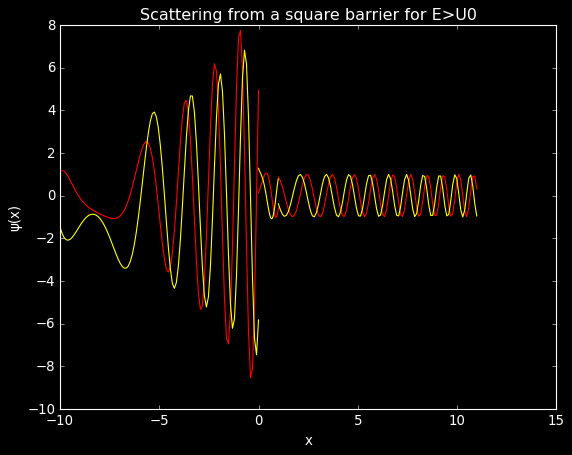

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

U0=1
mu= 2
L=1   
h= 1 

E=np.linspace(2,9 , num=100)
x1=np.linspace(-10*L,0 , num=100)
x2=np.linspace(0, L , num=100)
x3=np.linspace(L, 11*L, num=100)



def k(mu,h,E,U0):
    return np.sqrt(2*mu*E/h**2)
k=k(mu,h,E,U0)

def kp(mu,h,E,U0):
    return np.sqrt(2*mu*(E-U0)/h**2)
kp=kp(mu,h,E,U0)

# Region 1

def f1(k, x, kp, L):
    return np.exp(1j*k*x) + np.exp(-1j*k*x)*2*np.sinh(kp*L)*(kp+k)*(kp-k)/((kp+k)**2*np.exp(-1j*kp*L)-(kp-k)**2*np.exp(1j*kp*L))        
y=f1(k, x1, kp, L)

y=np.array(y)

plt.plot(x1 ,np.imag(y), label="Img", color='red')
plt.plot(x1 ,np.real(y), label="Real", color='yellow')

# Region 2

def F(k, kp, L):
    return 4*k*kp*np.exp(-1j*k*L)/((kp+k)**2*np.exp(-1j*kp*L)-(kp-k)**2*np.exp(1j*kp*L))
F =F(k, kp, L)

def f2(kp,L,k,F,x):
    return 0.5*np.exp(-1j*kp*L)*(1+k/kp)*np.exp(1j*k*L)*F*np.exp(1j*kp*x)+0.5*np.exp(1j*kp*L)*(1-k/kp)*np.exp(1j*k*L)*F*np.exp(-1j*kp*x)
y2=f2(kp,L,k,F,x2)
y2=np.array(y2)

plt.plot(x2 ,np.imag(y2), label="Img", color='red')
plt.plot(x2 ,np.real(y2), label="Real", color='yellow')

# Region 3

def f3(F,k,x):
    return F*np.exp(1j*k*x)

y3=f3(F,k,x3)
y3=np.array(y3)

plt.plot(x3 ,np.imag(y3), label="Img", color='red')
plt.plot(x3 ,np.real(y3), label="Real", color='yellow')
plt.xlabel('x');plt.ylabel('ψ(x)')
plt.title('Scattering from a square barrier for E>U0')


 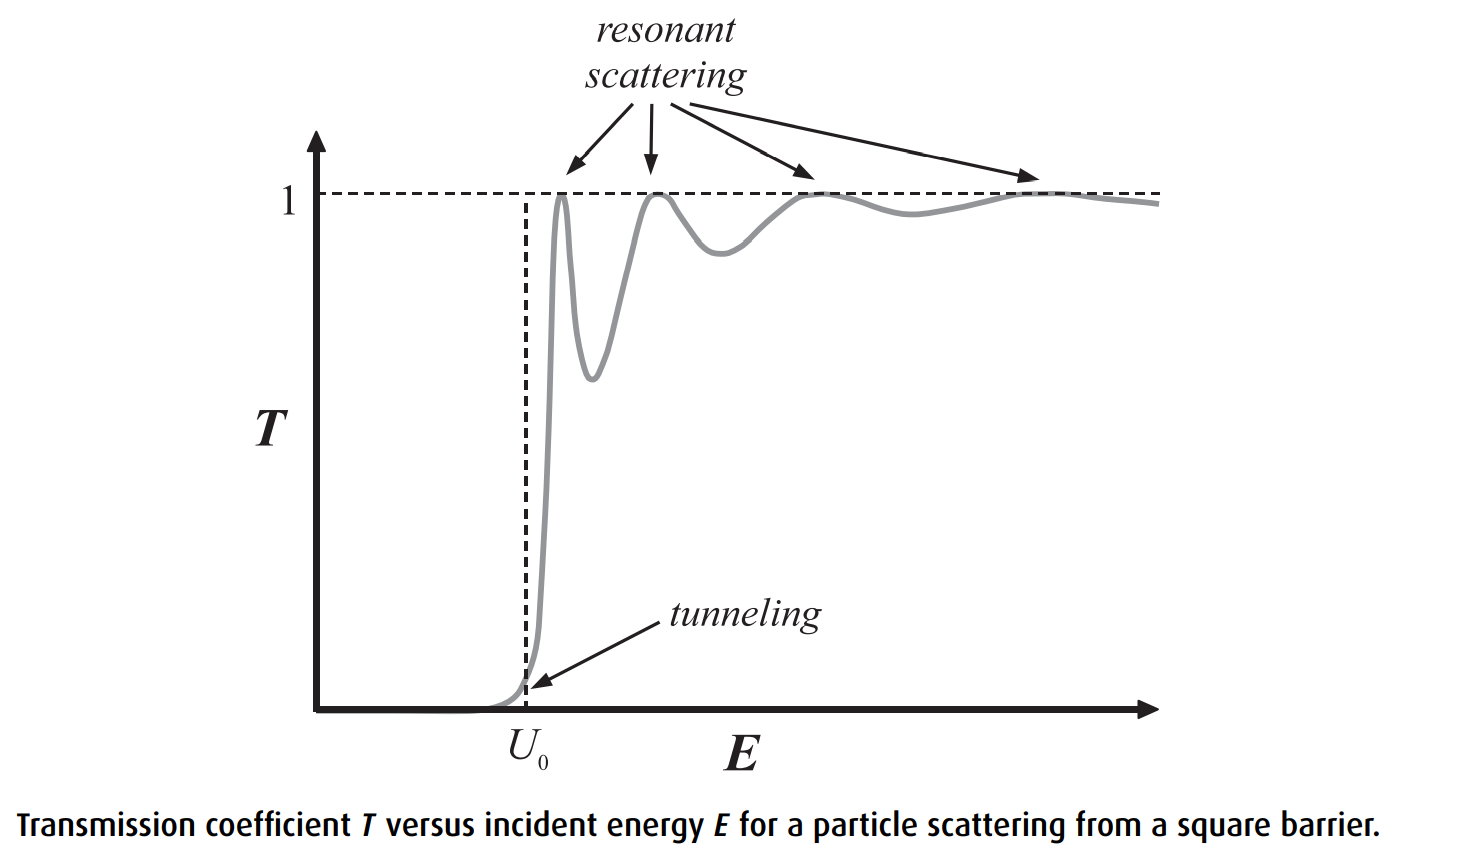

# Assignment 3

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 1 cm
> + V = 0

Boundary conditions:

$ ψ(x=a) = ψ(x=b) = 0 $




In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.linalg import solve,norm
import math
from scipy.integrate import quad
from numpy.linalg import matrix_rank
from scipy.interpolate import UnivariateSpline
from colorama import Fore
color=Fore.BLUE
plt.style.use('dark_background')

In [22]:
'''Domain'''

x_a = 0
x_b = 1

In [23]:
'''Parameters and data'''


u_a = 0
u_b = 0

In [24]:
'''Generate the source bias'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_bias_value), (x_b,source_bias_value)]
#shape_pts = [(x_a,source_bias_value), ((x_a+x_b)/2,1.3*source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), (0.2*(x_b+x_a)/2,-source_bias_value/4), (x_b,source_bias_value)]
#shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/8,2*source_bias_value), ((x_b+x_a)/4,source_bias_value), (3*(x_b+x_a)/4,2*source_bias_value), (x_b,source_bias_value)]

print('# shape pts = ', len(shape_pts))

source_bias = TargetFunction(shape_pts, type='stepwise')
source_bias = TargetFunction(shape_pts, type='linear')
source_bias = TargetFunction(shape_pts, type='legendre')
  
source_bias.plot(n_plot_pts=200, show_shape_pts=False, title='Source Bias')

NameError: name 'source_bias_value' is not defined

In [ ]:
'''Generate the source slope'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_slope_value), (x_b,source_slope_value)]
#shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/2,source_slope_value/4), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/8,4*source_slope_value), ((x_b+x_a)/4,source_slope_value/3), (3*(x_b+x_a)/4,2*source_slope_value), (x_b,source_slope_value)]

print('# shape pts = ', len(shape_pts))

source_slope = TargetFunction(shape_pts, type='legendre')
#source_slope = TargetFunction(shape_pts, type='linear')
  
source_slope.plot(n_plot_pts=200, show_shape_pts=True, title='Source Slope', y_label=r'$S(x)$')

### [Lift Function](#toc)<a id="lift-function"></a>
Since $w\in V(a,b)$, construct as follows $w = \sum\limits_{i=1}^N\,\alpha_i\,\phi_i$ such that $w(a) = u_a$.

In [ ]:
'''Build the basis functions'''

degree = 1
n_elem = 4

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
lift_basis = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b])
lift_basis.plot(n_plot_pts=300)

In [ ]:
'''Build the coefficients of the lift function'''
import numpy as np
alpha_vec = np.zeros(len(lift_basis.basis_func_list))
alpha_vec[0] = u_a

In [ ]:
'''Build the lift function'''

def w_lift(x):
    a_mtrx = lift_basis.evaluation_matrix(x)
    return a_mtrx@alpha_vec

In [ ]:
'''Build the lift function derivative'''

def w_lift_prime(x):
    a_mtrx = lift_basis.evaluation_matrix(x, derivative=True)
    return a_mtrx@alpha_vec

In [ ]:
'''Test boundary values'''

print('w(a) = ', w_lift(x_a))

In [ ]:
'''Rayleigh Ritz Method with FEM Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = w_lift(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Lift function')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(lift_basis.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$w(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

### [Finite Element Lagrange Basis Functions](#toc)<a id="fem-lagrange-basis"></a>

In [ ]:
'''Build the basis functions'''

degree = [2,2]
n_elem = [8,2]

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b-1.5, x_b], bc_x_min='dirichlet', bc_x_max='neumann')
femlb.plot(n_plot_pts=500)

In [ ]:
'''Build the matrix of coefficients of the linear system'''

import numpy as np
n = len(femlb.basis_func_list)
a_mtrx = np.zeros((n, n), dtype=np.float64)

# Diffusion
for i,phi_prime_i in enumerate(femlb.basis_func_prime_list):
    for j,phi_prime_j in enumerate(femlb.basis_func_prime_list):
        (a_ij, _) = femlb.inner_product(phi_prime_j, phi_prime_i)
        a_mtrx[i,j] = a_ij * diff_coeff
        
# Source        
for i,phi_i in enumerate(femlb.basis_func_list):
    for j,phi_j in enumerate(femlb.basis_func_list):
        s_x_phi_j = lambda x: source_slope(x) * phi_j(x)
        (a_ij, _) = femlb.inner_product(s_x_phi_j, phi_i)
        a_mtrx[i,j] -= a_ij

In [ ]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

In [ ]:
'''Build load vector'''

b_vec = np.zeros(n, dtype=np.float64)

for i, phi_i in enumerate(femlb.basis_func_list):
    # Source bias
    (b_vec[i], _) = femlb.inner_product(source_bias, phi_i) 
    # Lift function: diffusion
    (term1, _) = femlb.inner_product(w_lift_prime, femlb.basis_func_prime_list[i])
    b_vec[i] -= diff_coeff * term1
    # Lift function: linear source
    s_x_w = lambda x: source_slope(x) * w_lift(x)
    (term2, _) = femlb.inner_product(s_x_w, phi_i)
    b_vec[i] += term2
    # Neumann BC
    b_vec[i] -= q_nb * phi_i(x_b)

In [ ]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [ ]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    w = lift_basis.evaluation_matrix(x)@alpha_vec
    return u_0 + w

In [ ]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    w_prime = lift_basis.evaluation_matrix(x, derivative=True)@alpha_vec
    return u_prime_0 + w_prime

### [Results: Dirichlet/Neumann Boundary Conditions Case](#toc)<a id="results"></a>

In [ ]:
'''Rayleigh Ritz Method with Fourier Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Rayleigh-Ritz Solution w/ Dirichlet/Neumann BC')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) = ',u_star(x_a), '  u^*_N(b) = ',u_star(x_b), " u^*'_N(b) = ",u_prime_star(x_b))

In [ ]:
'''Flux at boundary'''

print('q_nb computed = ', -diff_coeff*u_prime_star(x_b))
print('q_nb given    = ', q_nb)
print('flux error [%]= ',(-diff_coeff*u_prime_star(x_b) - q_nb)/q_nb*100)